<a href="https://colab.research.google.com/github/AYUSH-11/Machine-Learning/blob/main/Ex_1_Linear_regression_multivariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#All mathematical operation are done by numpy
import numpy as np
#It is used for ploting 
import matplotlib.pyplot as plt
# for read all files
import pandas as pd

In [2]:
from google.colab import drive  #to import Google drive data

In [3]:
drive.mount('/content/drive') #to the drive data into colab cloud and enter the activation colab 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/Linear Regression"

/content/drive/My Drive/Colab Notebooks/Linear Regression


In [5]:
dataset = pd.read_csv('mpg.csv')    #read a csv file 

In [6]:
dataset = dataset.dropna()      

In [7]:
dataset.describe()

,MPG Highway,Passengers,Length,Wheelbase,Width,U Turn Space,Rear seat,Luggage,Weight,Horsepower,Fueltank
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,29.086022,5.086022,183.204301,103.946237,69.376344,38.956989,27.854839,14.010753,3072.903226,143.827957,16.664516
std,5.331726,1.038979,14.602382,6.819674,3.778986,3.223265,2.964996,3.034206,589.896510,52.374410,3.279370
min,20.000000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000,55.000000,9.200000
25%,26.000000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000,103.000000,14.500000
50%,28.000000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000,140.000000,16.400000
75%,31.000000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000,170.000000,18.800000
max,50.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000,300.000000,27.000000


In [8]:
Passengers=dataset.iloc[0:dataset.shape[0],1:2]
Length =dataset.iloc[0:dataset.shape[0],2:3]
Wheelbase = dataset.iloc[0:dataset.shape[0],3:4]
Width = dataset.iloc[0:dataset.shape[0],4:5]
U_Turn_Space = dataset.iloc[0:dataset.shape[0],5:6]
Rear_seat = dataset.iloc[0:dataset.shape[0],6:7]
Luggage = dataset.iloc[0:dataset.shape[0],7:8]
Weight = dataset.iloc[0:dataset.shape[0],8:9]
Horsepower = dataset.iloc[0:dataset.shape[0],9:10]
Fueltank = dataset.iloc[0:dataset.shape[0],10:11]
MPG_Highway = dataset.iloc[0:dataset.shape[0],0:1]

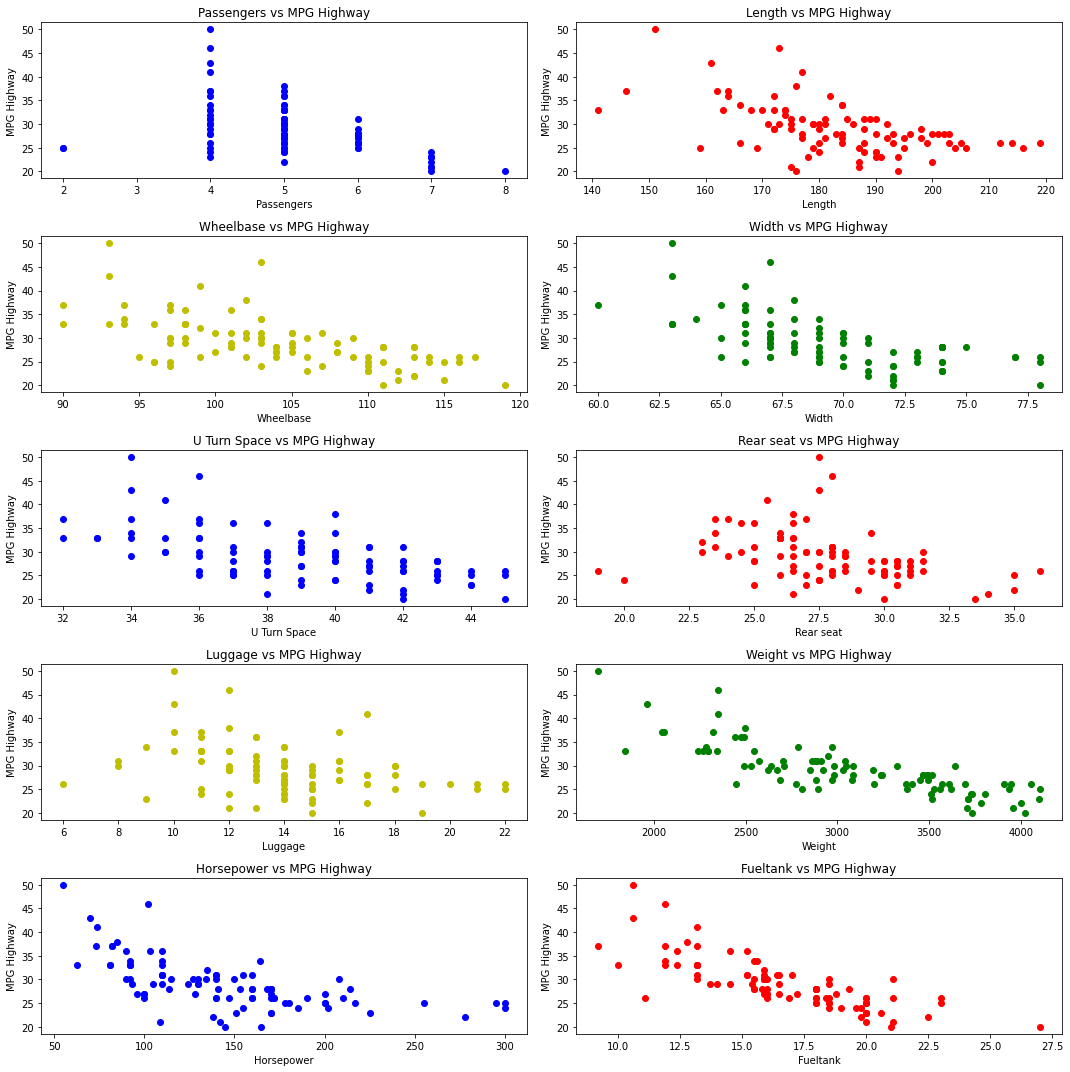

In [9]:
import matplotlib.pyplot as plt                         
fig,axes=plt.subplots(figsize=(15,15),nrows=5,ncols=2)
axes[0][0].scatter(Passengers,MPG_Highway,color='b')
axes[0][0].set_xlabel('Passengers')
axes[0][0].set_ylabel('MPG Highway')
axes[0][0].set_title('Passengers vs MPG Highway')

axes[0][1].scatter(Length,MPG_Highway,color='r')
axes[0][1].set_xlabel('Length')
axes[0][1].set_ylabel('MPG Highway')
axes[0][1].set_title('Length vs MPG Highway')

axes[1][0].scatter(Wheelbase,MPG_Highway,color='y')
axes[1][0].set_xlabel('Wheelbase')
axes[1][0].set_ylabel('MPG Highway')
axes[1][0].set_title('Wheelbase vs MPG Highway')

axes[1][1].scatter(Width,MPG_Highway,color='g')
axes[1][1].set_xlabel('Width')
axes[1][1].set_ylabel('MPG Highway')
axes[1][1].set_title('Width vs MPG Highway')

axes[2][0].scatter(U_Turn_Space,MPG_Highway,color='b')
axes[2][0].set_xlabel('U Turn Space')
axes[2][0].set_ylabel('MPG Highway')
axes[2][0].set_title('U Turn Space vs MPG Highway')

axes[2][1].scatter(Rear_seat,MPG_Highway,color='r')
axes[2][1].set_xlabel('Rear seat')
axes[2][1].set_ylabel('MPG Highway')
axes[2][1].set_title('Rear seat vs MPG Highway')

axes[3][0].scatter(Luggage,MPG_Highway,color='y')
axes[3][0].set_xlabel('Luggage')
axes[3][0].set_ylabel('MPG Highway')
axes[3][0].set_title('Luggage vs MPG Highway')

axes[3][1].scatter(Weight,MPG_Highway,color='g')
axes[3][1].set_xlabel('Weight')
axes[3][1].set_ylabel('MPG Highway')
axes[3][1].set_title('Weight vs MPG Highway')

axes[4][0].scatter(Horsepower,MPG_Highway,color='b')
axes[4][0].set_xlabel('Horsepower')
axes[4][0].set_ylabel('MPG Highway')
axes[4][0].set_title('Horsepower vs MPG Highway')

axes[4][1].scatter(Fueltank,MPG_Highway,color='r')
axes[4][1].set_xlabel('Fueltank')
axes[4][1].set_ylabel('MPG Highway')
axes[4][1].set_title('Fueltank vs MPG Highway')


plt.tight_layout()

In [10]:
#feature normalization
def featureNormalization(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_norm=(X-mean)/std
    return X_norm

In [11]:
dataset.shape

(93, 11)

In [12]:
data=dataset.values
n=len(data[:,1])
X=data[:,1:11].reshape(n,10)
x_norm=featureNormalization(X)
y= data[:,0:1].reshape(n,1)



In [13]:
size_feature=11
theta_array=np.zeros((size_feature,1))


In [14]:
def hypothesis(theta_array,x):
    res = theta_array[0]
    for i in range(1,size_feature):
        res=res+theta_array[i]*x[i-1]
    return res

In [15]:
#define cost function
#Here X is a 2D array where each column contains features
def cost_function(theta_array,x,y,m):
    #This function return cost at perticular theta
    total_error=0
    for i in range(m):
        temp_variable=hypothesis(theta_array,x[i])
        total_error+=(temp_variable-y[i])**2
    return  total_error/(2*m)

In [16]:
#define Gradient Descent Function
#Update theta value by Gradient Decent 
def gradient_descent(theta_array,x,y,alpha,m):  
    #This function will update theta value and return updated theta 
    len_summation=len(theta_array)
    summation_i=np.zeros(len_summation)

    for i in range(m):
        for j in range(len_summation):
            temp=hypothesis(theta_array,x[i])-y[i]
            if(j!=0):
                temp=temp*x[i][j-1]
            summation_i[j]+=temp

    new_theta_array=[]
    for i in range(len_summation):
        new_theta_array.append( theta_array[i] - alpha*(summation_i[i])/m)

    return new_theta_array

In [17]:
def training(X_norm,y,alpha,iters):
    theta_array=np.zeros(size_feature)
    m=len(X_norm)    #size of dataset or No of observation
    cost_function_values=[] # This array will store the value of cost function at each iteration
    
    for i in range(iters):
        #changing the value of all theta acording to Gradient Descent Method
        theta_array=gradient_descent(theta_array,X_norm,y,alpha,m)
        #store the value of cost funciton after each iteration
        cost_function_values.append(cost_function(theta_array,X_norm,y,m))

    # Graph between Number of iteration and cost values  
    x=np.arange(0,len(cost_function_values),step=1) 
    plt.plot(x,cost_function_values,"-b")
    plt.xlabel("Number of iteration")
    plt.ylabel("cost/loss values")
    plt.title("cost function curve")
    plt.show()
    return theta_array;

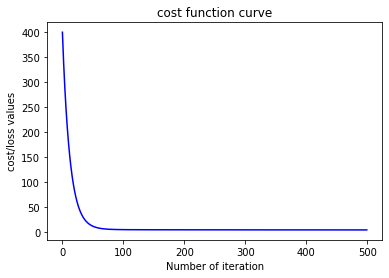

In [18]:
alpha=0.04                                  # here alpha is learning Rate
iter=500                                   # here iter is number of iteration
theta_array=training(x_norm,y,alpha,iter)

# Normal Equation

In [19]:
x=x_norm
column_to_be_added = np.array([np.ones(len(x_norm))])
x = np.hstack(( np.atleast_2d(column_to_be_added).T,x))

In [20]:
theta_array_using_matrix = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)         #Normal Equation Formula and calculate the theta array

In [22]:
cost_using_gradient_decent = cost_function(theta_array,x_norm,y,len(x_norm[0]))
cost_using_normal_equation = cost_function(theta_array_using_matrix,x_norm,y,len(x_norm[0]))
print(cost_using_gradient_decent,cost_using_normal_equation)

[2.99567124] [3.33515888]
